<a href="https://colab.research.google.com/github/julianovale/lean_6_sigma_python/blob/master/0005_teste_hipotese_teste_t.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Test t para uma amostra
## cenário
- O nível de serviço de um processo nas últimas 14 semanas foi medido. A média de performance foi de 94,5%, entretanto o "Acordo de Nível de Serviço", ANS, (Service Level Agreement) com o cliente determina performance de 95%. 
- O Teste T para uma amostra será usado para determinar se a média da amostra difere de maneira significativa de um valor especificado (padrão), no o ANS do exemplo, 95%.
- **Importante: a amostra deve ser proveniente de uma distribuição normal**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes =True)
%matplotlib inline
import statsmodels.api as sm
from scipy import stats
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro, wilcoxon

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
SLADT = pd.read_excel("https://github.com/julianovale/lean_6_sigma_python/blob/master/SLA.xlsx?raw=true")

In [3]:
SLADT

,SLA
0,95.004430
1,93.565637
2,94.737492
3,95.789231
4,95.530447
5,93.233199
6,94.903952
7,94.202423
8,95.675634
9,92.749504


In [4]:
stats.ttest_1samp(SLADT.SLA, 95)

Ttest_1sampResult(statistic=-1.3065269974711893, pvalue=0.21401598351235218)

- Se p-valor <  alpha: Rejeitar H0
- Se p-valor >= alpha: Aceitar H0 

- H0: A média encontrada é igual a 95%
- Ha: A média encontrada é de diferente de 95%.

- Nível de significância: alpha = 0.05 (5%)

- **Como p-valor >= alpha, então, a média é igual a 95%**



## Teste de normalidade
É necessário testar se a amostra vem de uma Distribuição Normal. No Teste T necessariamente a amostra deve vir de uma distribuição normal.

- Test whether a sample differs from a normal distribution.
- This function tests the null hypothesis that a sample comes
from a normal distribution.  It is based on D'Agostino and
Pearson's [1]_, [2]_ test that combines skew and kurtosis to
produce an omnibus test of normality.

&nbsp;
- **H0 = a amostra vem de uma distribuição normal**
- Ha = a amostra não vem de uma distruição normal
&nbsp;

- Se p-valor < alpha: Rejeitar H0
- Se p-valor >= alpha: Aceitar H0
- Neste caso aceita H0, ou seja, **a amostra vem de uma distribuição normal.**

In [5]:
stats.normaltest(SLADT.SLA).pvalue

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


0.7384860279627459

# Teste T para duas amostras


In [6]:
TDT = pd.read_excel("https://github.com/julianovale/lean_6_sigma_python/blob/master/2andpairedt.xlsx?raw=true")

In [7]:
TDT

,Pre,Post,Associate,Beforecoaching,Aftercoaching
0,30.105925,30.007614,A,3.999752,3.908891
1,30.107895,29.991830,B,4.006046,3.894249
2,30.119569,29.994598,C,3.999894,3.892256
3,30.096333,30.023697,D,3.974033,3.893144
4,30.092991,30.003774,E,4.005389,3.904257
5,30.092980,30.001910,F,4.008832,3.898088
6,30.107753,30.001502,G,4.013410,3.881486
7,30.103797,30.006164,H,3.994697,3.879631
8,30.101589,30.007950,I,4.013145,3.906453
9,30.084902,30.019612,J,4.011839,3.905207


## Test t para duas amostras independentes

- A equipe de tecnologia introduziu num processo, uma nova automação. O tempo de ciclo foi coletado antes e depois da automação. Eles necessitam avaliar se estatisticamente houve melhoria.
- This is a two-sided test for the null hypothesis that 2 independent samples
have identical average (expected) values. This test assumes that the
populations have identical variances by default
- H0: Pre = Post
- Ha: Pre != Post
- Alpha = 0.05
- Regra de decisão:
    - Se **valor_p < 0.05** = **Rejeitar H0**
    - Se **valor_p >= 0.05** = **Não rejeitar H0**

In [8]:
TWOTDT=TDT[['Pre', 'Post']]
TWOTDT

,Pre,Post
0,30.105925,30.007614
1,30.107895,29.991830
2,30.119569,29.994598
3,30.096333,30.023697
4,30.092991,30.003774
5,30.092980,30.001910
6,30.107753,30.001502
7,30.103797,30.006164
8,30.101589,30.007950
9,30.084902,30.019612


### Testando a normalidade e variância das amostras
- As amostras devem ter distribuição normal e ter variâncias similares

In [9]:
stats.normaltest(TWOTDT.Pre).pvalue, stats.normaltest(TWOTDT.Post).pvalue

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


(0.6531705824168154, 0.5100222307903698)

H0: a amostra apresenta distribuição normal. Como valor_p > 0.05, não se pode rejeitar H0, então, as amostras apresentam distribuição normal... Podemos seguir com o teste.

In [10]:
levene(TWOTDT.Pre, TWOTDT.Post)

LeveneResult(statistic=1.5738976177624129, pvalue=0.22001358733907092)

The Levene test tests the null hypothesis that all input samples are from populations with equal variances.
- H0: as amostras apresentam iguais variâncias, como o valor-p foi maior que 0.05, então pode-se considerar que as variâncias são similares. Podemos seguir com o teste.

### Um boxplot e o Teste t propriamente dito

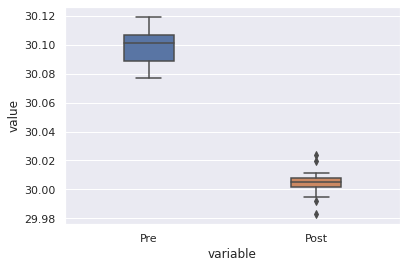

In [11]:
sns.boxplot(x='variable', y='value', data=pd.melt(TWOTDT), width=0.3)

In [12]:
t_statistics, p_value = ttest_ind(TWOTDT.Pre, TWOTDT.Post)
t_statistics, p_value

(22.085107571721483, 2.963586474101535e-19)

- como valor_p < 0.05, H0 deve ser rejeitada, portanto as amostras estatisticamente apresentam médias diferentes 

# Teste t para duas amostras pareadas

## Cenário
- Um conjunto de funcionários cuja performance não é boa, será submetido a um programa especializado de coach 1-to-1, por 3 meses. Os gerentes necessitam saber se o o programa foi efetivo. Foram coletados dados diários de média de defeito para todos os funcionários (pré e pós programa).
- This is a two-sided test for the null hypothesis that 2 related or repeated samples have identical average (expected) values.
- H0: média idêntica
- Ha: média diferente
- **Regra de decisão:**
    - Se valor-p < 0.05: Rejeito H0;
    - Se valor-p >= 0.05: Não devo rejeitar H0, aceitando que as médias são idênticas.

In [13]:
PAIRTDT=TDT[['Beforecoaching','Aftercoaching']]
PAIRTDT

,Beforecoaching,Aftercoaching
0,3.999752,3.908891
1,4.006046,3.894249
2,3.999894,3.892256
3,3.974033,3.893144
4,4.005389,3.904257
5,4.008832,3.898088
6,4.013410,3.881486
7,3.994697,3.879631
8,4.013145,3.906453
9,4.011839,3.905207


In [14]:
PAIRTDT.describe()

,Beforecoaching,Aftercoaching
count,15.000000,15.000000
mean,4.000138,3.895157
std,0.011038,0.010687
min,3.974033,3.878025
25%,3.994160,3.887183
50%,4.000336,3.894249
75%,4.007439,3.905347
max,4.013410,3.908891


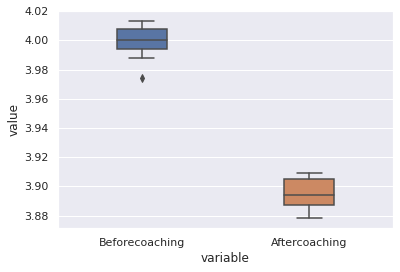

In [15]:
sns.boxplot(x='variable', y='value', data=pd.melt(PAIRTDT), width=0.3)

In [16]:
stats.normaltest(PAIRTDT.Beforecoaching).pvalue, stats.normaltest(PAIRTDT.Aftercoaching).pvalue

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


(0.21332517297557374, 0.19734137796686999)

In [17]:
# valores-p maiores que 0.05, portanto aceito H0 de que a amostra vem de uma distribuição normal.

In [18]:
stats.ttest_rel(PAIRTDT.Beforecoaching, PAIRTDT.Aftercoaching)

Ttest_relResult(statistic=31.04193826919751, pvalue=2.6039212090443113e-14)

In [19]:
# valor-p < 0.05, aceito H0, ou seja, as médias não são idênticas, demostrando o sucesso do programa de coaching.